# Phân tích tuyển dụng nghành nghề CNTT hiện nay

In [67]:
import json
import pandas as pd
import numpy as np
import re

**Đọc data từ file json**

In [68]:
with open("output .json", "r", encoding="utf-8") as f:
    df = json.load(f)

jobs = pd.DataFrame(df["listJob"])
jobs

,itemId,name,location,description,jobExperience,privilege,field
0,1,PHP Developer (Laravel/SQL) ~$1200,"Tầng 4, Toà Novo, Kosmo Tây Hồ, số 161 Xuân La...",Lập trình chính trong các dự án sử dụng ngôn n...,Ít nhất 03 năm kinh nghiệm phát triển phần mềm...,Thời gian làm việc linh hoạt:\nTừ thứ 2 - thứ ...,Thuê Ngoài Phát Triển Phần Mềm
1,2,"Embedded Engineer (C++, Linux/Android, Upto $2...","Handico Tower. Pham Hung street, Quận Nam Từ L...",1. General Description\nResearch and develop A...,3. Working Experience and Knowledge\nUniversit...,1. Benefits\nSalary will be negotiated depends...,Sản Xuất và Kỹ Thuật
2,3,"[DI8] Solution Architect (Java, K8s) - MSB DF ...","ROX Tower, 54A Nguyen Chi Thanh, phuong Lang T...",Vị trí SOLUTION ARCHITECT nằm trong chương trì...,Yêu cầu kỹ năng (Requirements):\nCó kinh nghiệ...,Dải lương: 2500$ - $3500\nTham gia vào các siê...,Ngân Hàng
3,4,Fresher/Junior Software Developer (Java/.NET/PHP),"15th floor, Opal Tower, 92 Nguyen Huu Canh, Wa...","Cung cấp giải pháp, phát triển phần mềm cho en...","Nhằm đáp ứng kế hoạch mở rộng kinh doanh, Alle...",Môi trường làm việc\nGiờ làm việc linh hoạt (t...,Thuê Ngoài Phát Triển Phần Mềm
4,5,Associate Consultant - Cyber Adversarial Emula...,"Hà Nội, Quận Ba Đình, Hà Nội",Report to : Cybersecurity Managers <Risk Advis...,"Requirements:\nDegree in a computing-related, ...",Opportunities:\nBeing granted for an extensive...,Sản Phẩm Phần Mềm và Dịch Vụ Web
...,...,...,...,...,...,...,...
1095,1,Senior Auto QA Engineer,"TNR Tower, 54A Nguyen Chi Thanh, Quận Đống Đa,...","Architect and build robust, scalable, and high...",5+ years in software testing \nExperience in a...,Join us to make the world a better place. Ever...,Dịch Vụ và Tư Vấn IT
1096,2,CV/CVC Quản trị CSDL DBA (Big Data),"108 Tran Hung Dao, Quận Hoàn Kiếm, Hà Nội","Cài đặt, cấu hình, nâng cấp, quản trị, giám sá...","1. Trình độ:\nTốt nghiệp đại học trở lên, chuy...",Thu nhập từ 25-28 tháng lương/năm\nĐược đào tạ...,Ngân Hàng
1097,3,Operation Monitor (NOC) (Linux) (làm ca),"Keangnam Hanoi Landmark Tower, Quận Cầu Giấy, ...",We are seeking for 02 Operation Monitor (Nhân ...,- At least 1 year experience with Linux/UNIX s...,*Remuneration \n• Salary: Competitive with luc...,Thuê Ngoài Phát Triển Phần Mềm
1098,4,Senior Cloud DevOps Engineer,"89 Lang Ha, Quận Đống Đa, Hà Nội",Designing and building toolchains and workflow...,1. Educational Qualifications\nBachelor’s degr...,"What we offer:\nAttractive income, competitive...",Ngân Hàng


In [69]:
# Tạo dataFrame cho bộ dữ liệu
data = pd.DataFrame(jobs, columns =['name'])
data

,name
0,PHP Developer (Laravel/SQL) ~$1200
1,"Embedded Engineer (C++, Linux/Android, Upto $2..."
2,"[DI8] Solution Architect (Java, K8s) - MSB DF ..."
3,Fresher/Junior Software Developer (Java/.NET/PHP)
4,Associate Consultant - Cyber Adversarial Emula...
...,...
1095,Senior Auto QA Engineer
1096,CV/CVC Quản trị CSDL DBA (Big Data)
1097,Operation Monitor (NOC) (Linux) (làm ca)
1098,Senior Cloud DevOps Engineer


**Trực quan hóa các từ có trong tập dữ liệu**

In [70]:
def word_count(sentence):
    return len(sentence.split())

data['word count']= data['name'].apply(word_count)
data['word count'].describe()

count    1100.000000
mean        5.080000
std         1.886922
min         2.000000
25%         4.000000
50%         5.000000
75%         6.000000
max        13.000000
Name: word count, dtype: float64

In [71]:
# Lọc các dòng không có dữ liệu
subdata = data[data['word count'] >= 1]
subdata

,name,word count
0,PHP Developer (Laravel/SQL) ~$1200,4
1,"Embedded Engineer (C++, Linux/Android, Upto $2...",6
2,"[DI8] Solution Architect (Java, K8s) - MSB DF ...",10
3,Fresher/Junior Software Developer (Java/.NET/PHP),4
4,Associate Consultant - Cyber Adversarial Emula...,6
...,...,...
1095,Senior Auto QA Engineer,4
1096,CV/CVC Quản trị CSDL DBA (Big Data),7
1097,Operation Monitor (NOC) (Linux) (làm ca),6
1098,Senior Cloud DevOps Engineer,4


In [72]:
import collections
all_words = []
for line in list(data['name']): #Chia chuỗi thành các đơn từ
    words = line.split()
    for word in words:
        all_words.append(word.lower())

collections.Counter(all_words).most_common(20)#In ra 20 từ phổ biến nhất

[('developer', 330),
 ('engineer', 310),
 ('senior', 234),
 ('-', 137),
 ('backend', 82),
 ('software', 80),
 ('manager', 67),
 ('fullstack', 54),
 ('analyst', 53),
 ('frontend', 50),
 ('java', 50),
 ('business', 48),
 ('lead', 46),
 ('devops', 43),
 ('data', 42),
 ('qa', 40),
 ('project', 39),
 ('automation', 38),
 ('to', 38),
 ('product', 36)]

In [73]:
import nltk
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from math import log, sqrt

Text(0.5, 0, 'Word Rank')

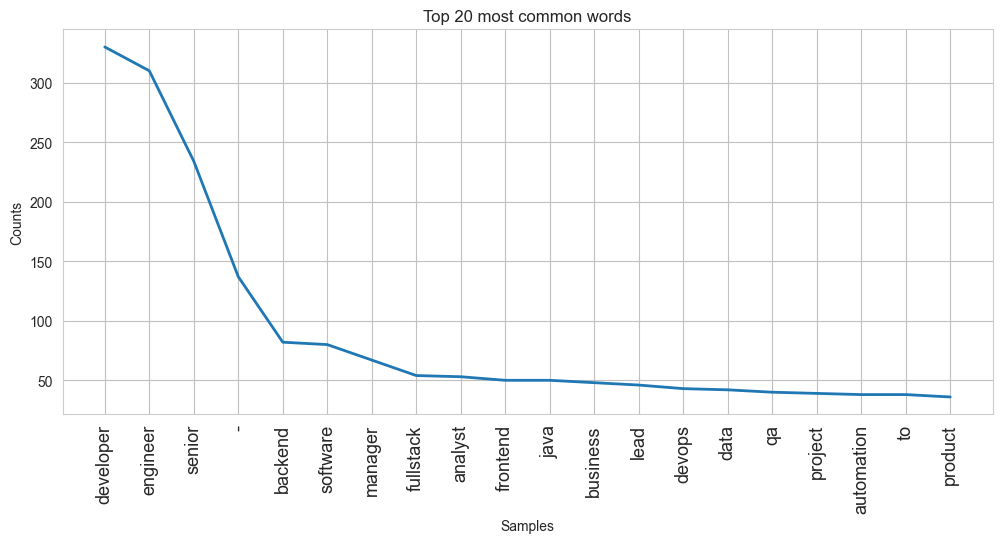

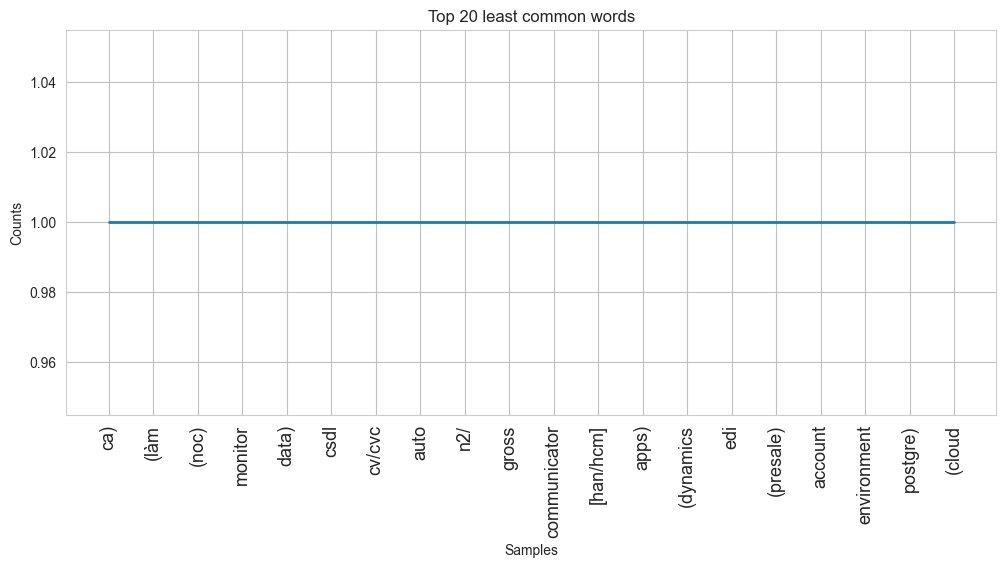

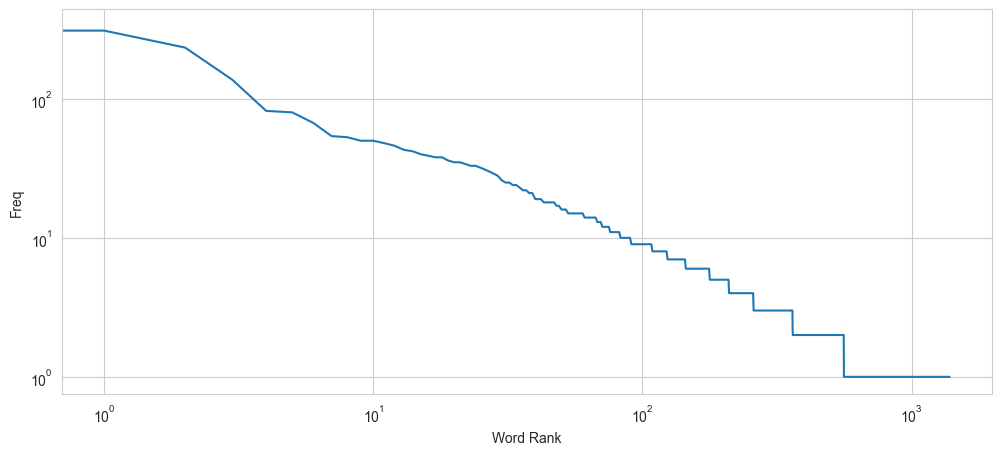

In [74]:
# 1. Biểu đồ 20 từ phổ biến nhất
plt.figure(figsize=(12, 5))
plt.title('Top 20 most common words')
plt.xticks(fontsize=13, rotation=90)
fd = nltk.FreqDist(all_words)
fd.plot(20, cumulative=False)

# 2. Biểu đồ 20 từ ít phổ biến nhất
plt.figure(figsize=(12,5))
plt.title('Top 20 least common words')
plt.xticks(fontsize=13, rotation=90)
word_counts = collections.Counter(all_words)
least_common_words = word_counts.most_common()[:-21:-1] 
fd_least = nltk.FreqDist(dict(least_common_words))
fd_least.plot(cumulative=False)

# 3. Biểu đồ log-log:
word_counts = sorted(collections.Counter(all_words).values(), reverse=True)
plt.figure(figsize=(12,5))
plt.loglog(word_counts, linestyle='-', linewidth=1.5)
plt.ylabel("Freq")
plt.xlabel("Word Rank")

**Xử lý ngôn ngữ tự nhiên**

**Tiền xử lý dữ liệu**
- Làm sạch dữ liệu

In [75]:
import string
def process_tweet(tweet):
    # Loại bỏ dấu gạch ngang và khoảng trắng xung quanh
    tweet = re.sub(r'\s*-\s*', ' ', tweet)
    # Xóa các thực thể đặc biệt của HTML (ví dụ: &amp;)
    tweet = re.sub(r'\&\w*;', '', tweet)
    # Chuyển đổi @username thành AT_USER
    tweet = re.sub('@[^\s]+','',tweet)
    # Remove tickers
    tweet = re.sub(r'\$\w*', '', tweet)
    # To lowercase
    tweet = tweet.lower()
    # Remove hyperlinks
    tweet = re.sub(r'https?:\/\/.*\/\w*', '', tweet)
    # Xóa dấu câu và tách 's, 't, 've bằng một khoảng trắng cho bộ lọc
    tweet = re.sub(r'['+string.punctuation+']+', ' ', tweet)
    # Xóa các từ có 2 kí tự trở xuống
    tweet = re.sub(r'\b\w{1,2}\b', '', tweet)
    # Remove whitespace (including new line characters)
    tweet = re.sub(r'\s\s+', ' ', tweet)
    # Remove single space remaining at the front of the tweet.
    tweet = tweet.lstrip(' ')
    # Remove characters beyond Basic Multilingual Plane (BMP) of Unicode:
    tweet = ''.join(c for c in tweet if c <= '\uFFFF')
    return tweet

<>:8: SyntaxWarning: invalid escape sequence '\s'
<>:8: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Admin\AppData\Local\Temp\ipykernel_22308\1053186706.py:8: SyntaxWarning: invalid escape sequence '\s'
  tweet = re.sub('@[^\s]+','',tweet)


In [76]:
data['text'] = data['name'].apply(process_tweet)
# preview some cleaned tweets
data['text'].head()

0                          php developer laravel sql 
1               embedded engineer linux android upto 
2           di8 solution architect java k8s msb 3i095
3     fresher junior software developer java net php 
4    associate consultant cyber adversarial emulation
Name: text, dtype: object


  - Lemmatization

In [77]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import nltk
from pyvi import ViTokenizer, ViPosTagger

nltk.download('punkt')
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer() #Xóa bỏ hậu tố của tiếng Anh

def lemmatize_english(text):
    tokens = word_tokenize(text.lower())
    lemmas = [lemmatizer.lemmatize(token) for token in tokens if token.isalpha()]
    return lemmas

def lemmatize_vietnamese(text):
    # Tách từ và gán nhãn từ loại
    words, pos_tags = ViPosTagger.postagging(text)
    
    # Lấy các từ là danh từ (N) hoặc động từ (V)
    lemmas = [word for word, pos in zip(words, pos_tags) if pos.startswith('N') or pos.startswith('V')]
    
    return lemmas

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [78]:
def lemmatize_combined(text):
    tokens_en = lemmatize_english(text)
    tokens_vi = lemmatize_vietnamese(text)
    combined = tokens_en + tokens_vi
    return list(dict.fromkeys(combined)) 

In [79]:
nltk.download('punkt')

data['lemm_name']=data.text.apply(lemmatize_combined)
data['temp_name']=[' '.join(map(str, l))for l in data['lemm_name']]

data.head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,name,word count,text,lemm_name,temp_name
0,PHP Developer (Laravel/SQL) ~$1200,4,php developer laravel sql,"[php, developer, laravel, sql, ]",php developer laravel sql
1,"Embedded Engineer (C++, Linux/Android, Upto $2...",6,embedded engineer linux android upto,"[embedded, engineer, linux, android, upto, ]",embedded engineer linux android upto
2,"[DI8] Solution Architect (Java, K8s) - MSB DF ...",10,di8 solution architect java k8s msb 3i095,"[solution, architect, java, msb, di8, k8s]",solution architect java msb di8 k8s
3,Fresher/Junior Software Developer (Java/.NET/PHP),4,fresher junior software developer java net php,"[fresher, junior, software, developer, java, n...",fresher junior software developer java net php
4,Associate Consultant - Cyber Adversarial Emula...,6,associate consultant cyber adversarial emulation,"[associate, consultant, cyber, adversarial, em...",associate consultant cyber adversarial emulation



- Tokenization

In [80]:
# Tạo ra danh sách stopwords
stop_words = set([
    "the","a","an","and","or","is","to","with","on",
    "at","in","by","for","from","this","that","it",
    "as","are","because","và", "là", "có", "cho","của", "những",
    "các", "một","này", "kia", "thì", "đã", "cho","khi",
    "được","hay","hoặc","đã""sẽ", "tôi", "bạn","trong"
    ])

In [81]:
from textblob import Word
def text_process(raw_text):
    # Check characters to see if they are in punctuation
    nopunc = [char for char in list(raw_text) if char not in string.punctuation]
    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)

    # remove all stopwords
    return [word for word in nopunc.lower().split() if word.lower() not in stop_words]

def remove_words(word_list):
    remove = ['i','me','my','flight','hour','minute','wa','airline','bag','plane','cancelled','myself','we','our','ours','ourselves','you',"you're","you've","you'll","you'd",'your','yours','yourself','yourselves','he','him','his','himself','she',"she's",'her','hers','herself','it',"it's",'its','itself','they','them','their','theirs','themselves','what','which','who','whom','this','that',"that'll",'these','those','am','is','are','was','were','be','been','being','have','has','had','having','do','does','did','doing','a','an','the','and','but','if','or','because','as','until','while','of','at','by','for','with','about','against','between','into','through','during','before','after','above','below','to','from','up','down','in','out','on','off','over','under','again','further','then','once','here','there','when','where','why','how','all','any','both','each','few','more','most','other','some','such','...','“','”','’','...']
    return [w for w in word_list if w not in remove]

In [82]:
# tokenize message column and create a column for tokens
data['temp']=data['temp_name'].apply(text_process)
data['tokens']=data['temp'].apply(remove_words)
data[['text','temp_name','temp','tokens']]

,text,temp_name,temp,tokens
0,php developer laravel sql,php developer laravel sql,"[php, developer, laravel, sql]","[php, developer, laravel, sql]"
1,embedded engineer linux android upto,embedded engineer linux android upto,"[embedded, engineer, linux, android, upto]","[embedded, engineer, linux, android, upto]"
2,di8 solution architect java k8s msb 3i095,solution architect java msb di8 k8s,"[solution, architect, java, msb, di8, k8s]","[solution, architect, java, msb, di8, k8s]"
3,fresher junior software developer java net php,fresher junior software developer java net php,"[fresher, junior, software, developer, java, n...","[fresher, junior, software, developer, java, n..."
4,associate consultant cyber adversarial emulation,associate consultant cyber adversarial emulation,"[associate, consultant, cyber, adversarial, em...","[associate, consultant, cyber, adversarial, em..."
...,...,...,...,...
1095,senior auto engineer,senior auto engineer,"[senior, auto, engineer]","[senior, auto, engineer]"
1096,cvc quản trị csdl dba big data,cvc quản trị csdl dba big data,"[cvc, quản, trị, csdl, dba, big, data]","[cvc, quản, trị, csdl, dba, big, data]"
1097,operation monitor noc linux làm,operation monitor noc linux làm,"[operation, monitor, noc, linux, làm]","[operation, monitor, noc, linux, làm]"
1098,senior cloud devops engineer,senior cloud devops engineer,"[senior, cloud, devops, engineer]","[senior, cloud, devops, engineer]"


**Trực quan hóa dữ liệu**

- Word Cloud

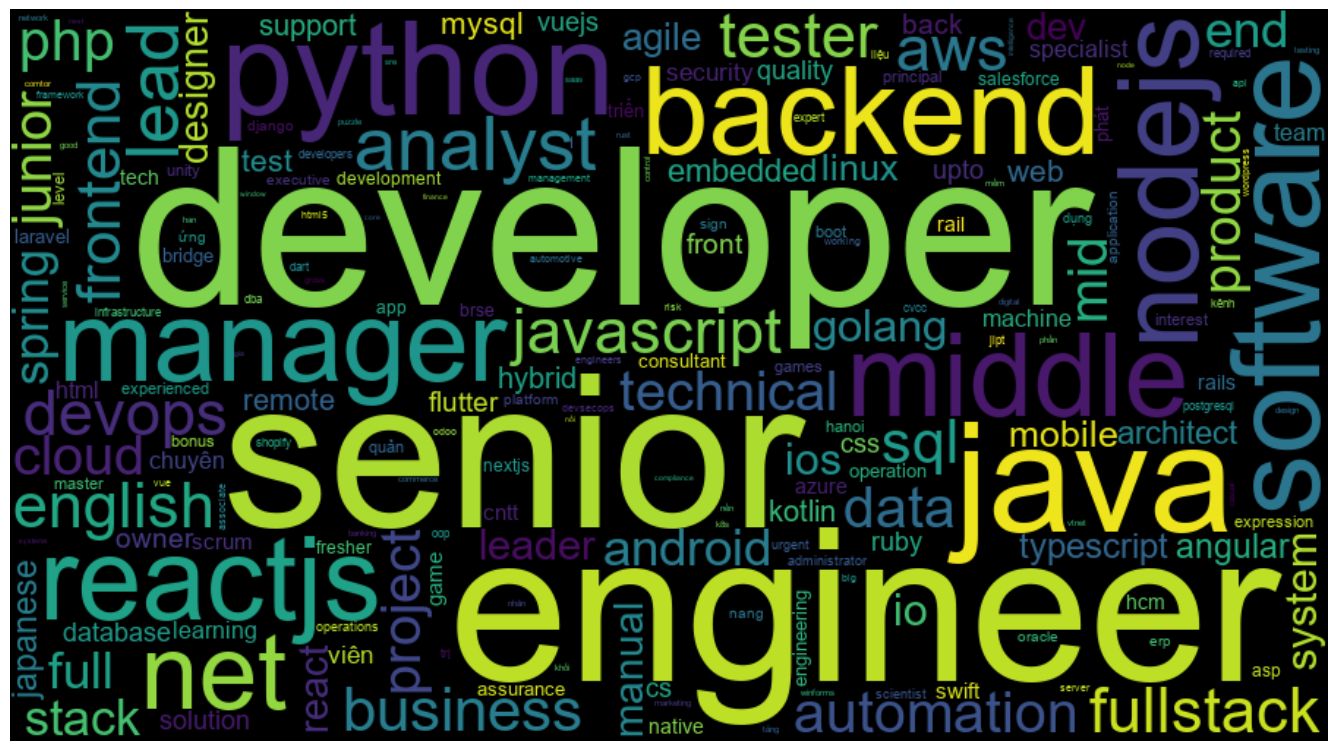

In [83]:
all_words = []
for line in data['tokens']:
    all_words.extend(line)


# create a word frequency dictionary
wordfreq = collections.Counter(all_words)# draw a Word Cloud with word frequencies
wordcloud = WordCloud(width=900,
                      height=500,
                      background_color="black",
                      font_path="arial.ttf",
                      max_font_size=150,
                      colormap = 'viridis',
                      relative_scaling=0.5,
                      normalize_plurals=True).generate_from_frequencies(wordfreq)
plt.figure(figsize=(17,14))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

- Word Frequenecy

In [84]:
import collections
all_words = []
for line in list(data['tokens']):
    for word in line:
        all_words.append(word.lower())

collections.Counter(all_words).most_common(10)

[('developer', 343),
 ('engineer', 330),
 ('senior', 330),
 ('java', 142),
 ('python', 102),
 ('software', 88),
 ('backend', 87),
 ('middle', 78),
 ('reactjs', 78),
 ('manager', 76)]

Text(0.5, 1.0, 'log-log plot of words frequency')

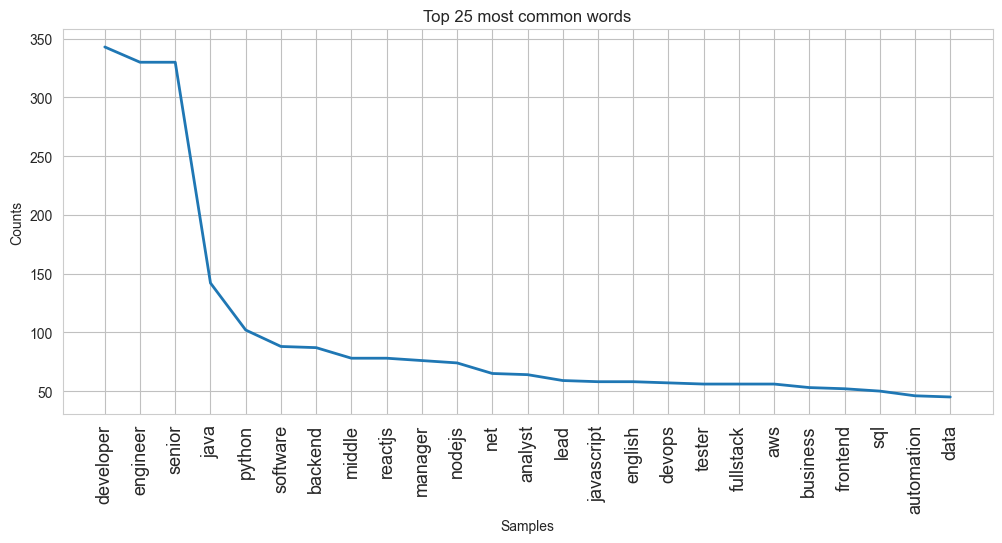

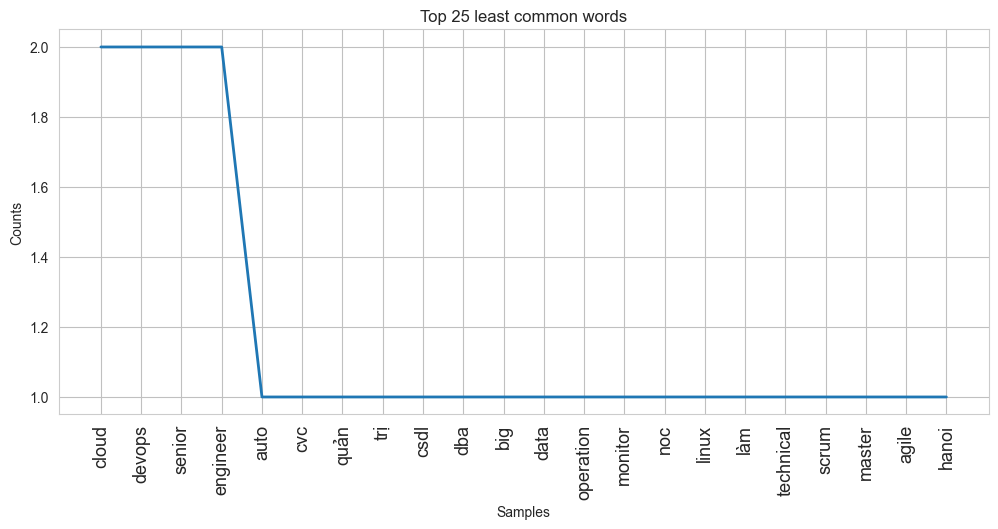

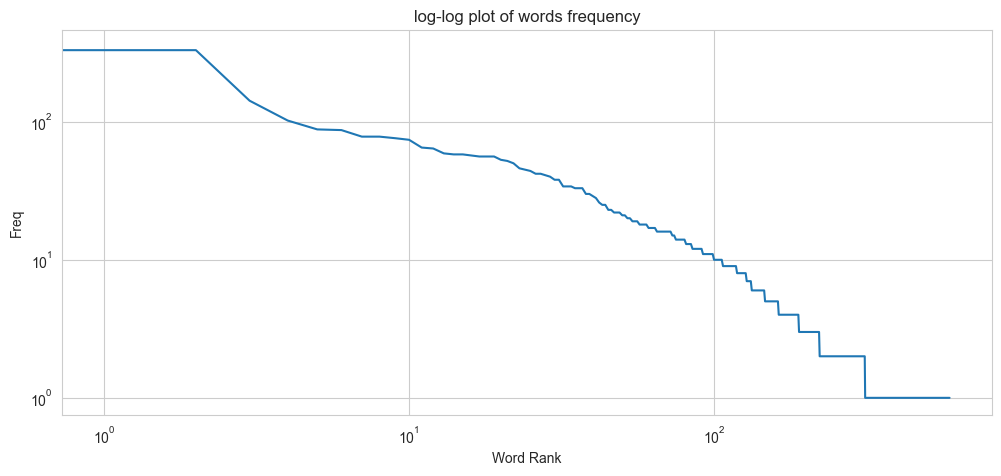

In [85]:
#plot word frequency distribution of most common words
plt.figure(figsize=(12,5))
plt.title('Top 25 most common words')
plt.xticks(fontsize=13, rotation=90)
fd = nltk.FreqDist(all_words)
fd.plot(25,cumulative=False)

# plot word frequency distribution of least common words
plt.figure(figsize=(12,5))
plt.title('Top 25 least common words')
plt.xticks(fontsize=13, rotation=90)
fd = nltk.FreqDist(all_words[-26:])
fd.plot(cumulative=False)

# log-log plot
word_counts = sorted(collections.Counter(all_words).values(), reverse=True)
plt.figure(figsize=(12,5))
plt.loglog(word_counts, linestyle='-', linewidth=1.5)
plt.ylabel("Freq")
plt.xlabel("Word Rank")
plt.title('log-log plot of words frequency')

In [86]:
data.head()

,name,word count,text,lemm_name,temp_name,temp,tokens
0,PHP Developer (Laravel/SQL) ~$1200,4,php developer laravel sql,"[php, developer, laravel, sql, ]",php developer laravel sql,"[php, developer, laravel, sql]","[php, developer, laravel, sql]"
1,"Embedded Engineer (C++, Linux/Android, Upto $2...",6,embedded engineer linux android upto,"[embedded, engineer, linux, android, upto, ]",embedded engineer linux android upto,"[embedded, engineer, linux, android, upto]","[embedded, engineer, linux, android, upto]"
2,"[DI8] Solution Architect (Java, K8s) - MSB DF ...",10,di8 solution architect java k8s msb 3i095,"[solution, architect, java, msb, di8, k8s]",solution architect java msb di8 k8s,"[solution, architect, java, msb, di8, k8s]","[solution, architect, java, msb, di8, k8s]"
3,Fresher/Junior Software Developer (Java/.NET/PHP),4,fresher junior software developer java net php,"[fresher, junior, software, developer, java, n...",fresher junior software developer java net php,"[fresher, junior, software, developer, java, n...","[fresher, junior, software, developer, java, n..."
4,Associate Consultant - Cyber Adversarial Emula...,6,associate consultant cyber adversarial emulation,"[associate, consultant, cyber, adversarial, em...",associate consultant cyber adversarial emulation,"[associate, consultant, cyber, adversarial, em...","[associate, consultant, cyber, adversarial, em..."


In [87]:
data['clean_name'] = [' '.join(map(str, l)) for l in data['tokens']]
data=data.drop(columns=['lemm_name','text','temp_name', 'word count'])
data.head()

,name,temp,tokens,clean_name
0,PHP Developer (Laravel/SQL) ~$1200,"[php, developer, laravel, sql]","[php, developer, laravel, sql]",php developer laravel sql
1,"Embedded Engineer (C++, Linux/Android, Upto $2...","[embedded, engineer, linux, android, upto]","[embedded, engineer, linux, android, upto]",embedded engineer linux android upto
2,"[DI8] Solution Architect (Java, K8s) - MSB DF ...","[solution, architect, java, msb, di8, k8s]","[solution, architect, java, msb, di8, k8s]",solution architect java msb di8 k8s
3,Fresher/Junior Software Developer (Java/.NET/PHP),"[fresher, junior, software, developer, java, n...","[fresher, junior, software, developer, java, n...",fresher junior software developer java net php
4,Associate Consultant - Cyber Adversarial Emula...,"[associate, consultant, cyber, adversarial, em...","[associate, consultant, cyber, adversarial, em...",associate consultant cyber adversarial emulation


- Network graph

In [88]:
from nltk import bigrams
terms_bigram = [list(bigrams(tweet)) for tweet in data.tokens]
terms_bigram[0]

[('php', 'developer'), ('developer', 'laravel'), ('laravel', 'sql')]

In [89]:
import itertools
# Flatten list of bigrams in clean tweets
# In tất cả các giá trị có trong terms_bigram có thể lặp lại lần lượt
bigrams = list(itertools.chain(*terms_bigram))
# Create counter of words in clean bigrams
bigram_counts = collections.Counter(bigrams)
bigram_counts.most_common(25)

[(('business', 'analyst'), 50),
 (('software', 'engineer'), 50),
 (('middle', 'senior'), 49),
 (('devops', 'engineer'), 42),
 (('backend', 'developer'), 41),
 (('project', 'manager'), 35),
 (('full', 'stack'), 33),
 (('engineer', 'python'), 30),
 (('developer', 'java'), 27),
 (('senior', 'backend'), 27),
 (('java', 'developer'), 27),
 (('developer', 'nodejs'), 27),
 (('frontend', 'developer'), 27),
 (('fullstack', 'developer'), 26),
 (('backend', 'engineer'), 26),
 (('data', 'engineer'), 25),
 (('stack', 'developer'), 22),
 (('developer', 'reactjs'), 22),
 (('end', 'developer'), 21),
 (('net', 'developer'), 20),
 (('developer', 'python'), 17),
 (('front', 'end'), 17),
 (('senior', 'java'), 17),
 (('product', 'owner'), 16),
 (('senior', 'fullstack'), 16)]

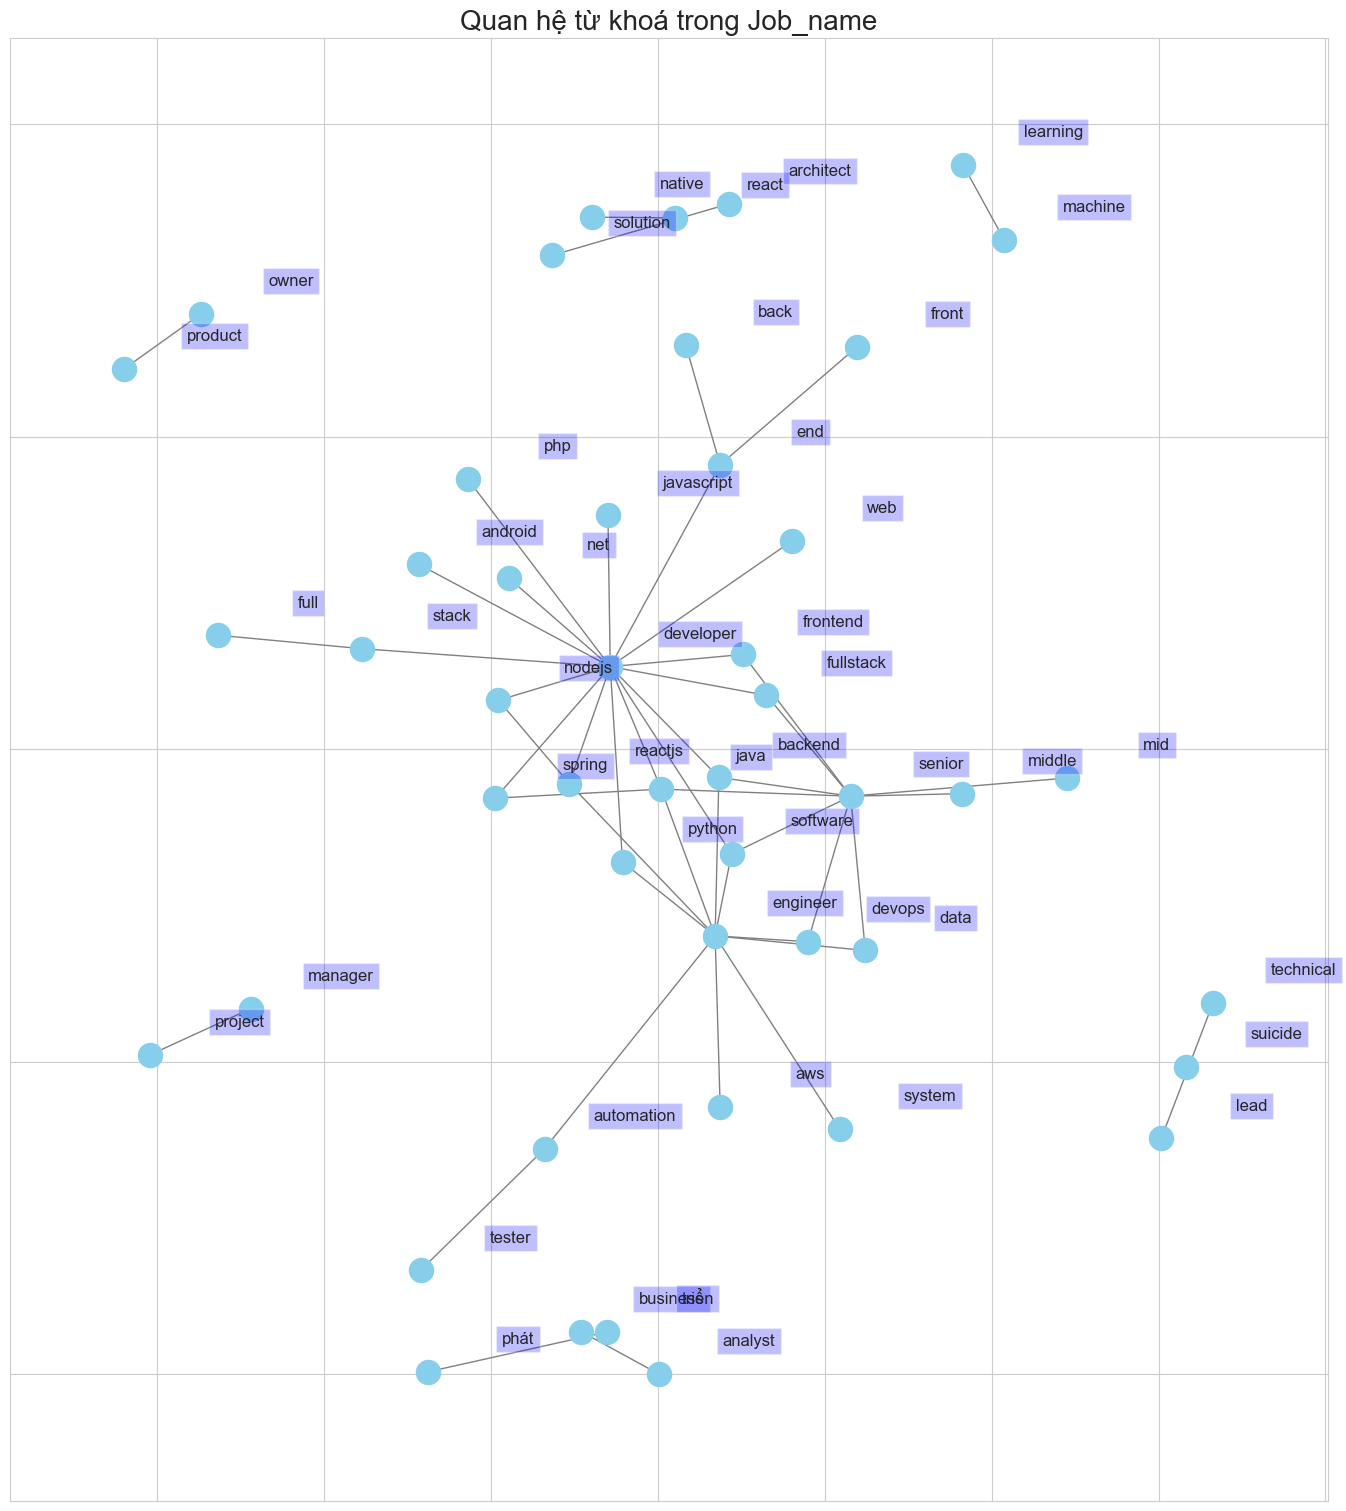

In [90]:
import networkx as nx
bigram_df = pd.DataFrame(bigram_counts.most_common(50),columns=['bigram', 'count'])

# Create dictionary of bigrams and their counts
d = bigram_df.set_index('bigram').T.to_dict('records')

# Create network plot # Tạo một biểu đồ trống
G = nx.Graph()

# Create connections between nodes
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v * 10))

G.add_node("suicide", weight=100) # Thêm node sad tỏng G

fig, ax = plt.subplots(figsize=(17, 19))

pos = nx.spring_layout(G, k=2) # tanawmg khoảng cách giữa các node là 2

# Plot networks
nx.draw_networkx(G, pos,
                 edge_color='grey',
                 node_color='skyblue',
                 with_labels = False,
                 ax=ax)

# Create offset labels
for key, value in pos.items():
    x, y = value[0]+.135, value[1]+.045
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='blue', alpha=0.25),
            horizontalalignment='center', fontsize=12)


plt.title("Quan hệ từ khoá trong Job_name", fontsize=20)
plt.show()

- Bar chart

In [91]:
import pandas as pd
from collections import Counter

# Trích xuất tất cả các giá trị của trường 'name' vào một danh sách
fields = data['name'].tolist()

# Đếm tần suất của mỗi trường
field_counts = Counter(fields)

# Chuyển đổi kết quả thành DataFrame để dễ xử lý và vẽ biểu đồ
field_df = pd.DataFrame(list(field_counts.items()), columns=['Field', 'Count'])
field_df = field_df.sort_values(by='Count', ascending=False).head(20)
field_df.head()

,Field,Count
328,Business Analyst,6
100,Project Manager,4
87,Senior Data Engineer,3
39,Senior DevOps Engineer,3
191,DevOps Engineer,3


C:\Users\Admin\AppData\Local\Temp\ipykernel_22308\446712620.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="Count", y="Field", data=field_df, palette="viridis")


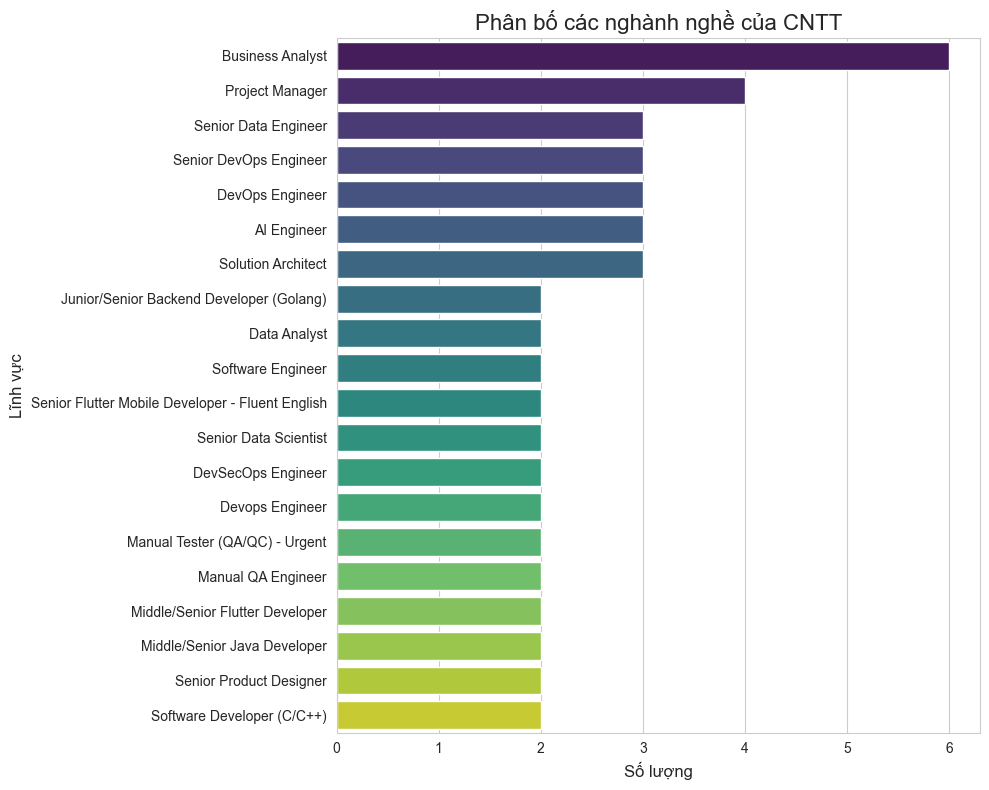

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns

# Thiết lập kiểu đồ thị
sns.set_style("whitegrid")

# Tạo biểu đồ
plt.figure(figsize=(10, 8))
ax = sns.barplot(x="Count", y="Field", data=field_df, palette="viridis")

# Hiển thị số lượng trên mỗi cột
for p in ax.patches:
    ax.annotate(f'{p.get_width()}', (p.get_width() + 5, p.get_y() + p.get_height() / 2),
                ha='left', va='center', fontsize=10)

# Đặt tiêu đề và nhãn
plt.title('Phân bố các nghành nghề của CNTT', fontsize=16)
plt.xlabel('Số lượng', fontsize=12)
plt.ylabel('Lĩnh vực', fontsize=12)

# Điều chỉnh layout và hiển thị biểu đồ
plt.tight_layout()
plt.show()

**Sentiment Analysis**

In [93]:
from textblob import TextBlob
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [94]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# assuming your cleaned data is in a DataFrame called 'df' and the text is in a column called 'text'
# initialize the VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# apply the VADER sentiment analyzer to each sentence in the 'text' column and create a new column called 'sentiment'
data['sentiment'] = data['clean_name'].apply(lambda x: sid.polarity_scores(x)['compound'])

# classify each sentence as positive, negative or neutral based on the 'sentiment' score
data['sentiment_class'] = pd.cut(data['sentiment'], bins=[-1, -0.1, 0.1, 1], labels=['negative', 'neutral', 'positive'])

# print the first 10 rows of the DataFrame
print(data.head(10))


                                                name  \
0                 PHP Developer (Laravel/SQL) ~$1200   
1  Embedded Engineer (C++, Linux/Android, Upto $2...   
2  [DI8] Solution Architect (Java, K8s) - MSB DF ...   
3  Fresher/Junior Software Developer (Java/.NET/PHP)   
4  Associate Consultant - Cyber Adversarial Emula...   
5                  Junior Quality Control Specialist   
6        Senior Business Analyst (BA, Tester, QA QC)   
7                          Software Engineer in Test   
8          Frontend & Tech Support (JavaScript, PHP)   
9                           Test Automation Engineer   

                                                temp  \
0                     [php, developer, laravel, sql]   
1         [embedded, engineer, linux, android, upto]   
2         [solution, architect, java, msb, di8, k8s]   
3  [fresher, junior, software, developer, java, n...   
4  [associate, consultant, cyber, adversarial, em...   
5             [junior, quality, control, specia

In [95]:
import numpy as np

# Define neutral range
neutral_min = -0.2
neutral_max = 0.2

# Create empty list for sentiment labels0
sentiment_labels = []

# Loop through sentiment scores
for score in data.sentiment:
    if score < neutral_min:
        # Sentiment is negative
        sentiment_labels.append(0)
    elif score > neutral_max:
        # Sentiment is positive
        sentiment_labels.append(1)
    else:
        # Sentiment is neutral
        sentiment_labels.append(2)

In [96]:
data['label'] = sentiment_labels
data

,name,temp,tokens,clean_name,sentiment,sentiment_class,label
0,PHP Developer (Laravel/SQL) ~$1200,"[php, developer, laravel, sql]","[php, developer, laravel, sql]",php developer laravel sql,0.0000,neutral,2
1,"Embedded Engineer (C++, Linux/Android, Upto $2...","[embedded, engineer, linux, android, upto]","[embedded, engineer, linux, android, upto]",embedded engineer linux android upto,0.0000,neutral,2
2,"[DI8] Solution Architect (Java, K8s) - MSB DF ...","[solution, architect, java, msb, di8, k8s]","[solution, architect, java, msb, di8, k8s]",solution architect java msb di8 k8s,0.3182,positive,1
3,Fresher/Junior Software Developer (Java/.NET/PHP),"[fresher, junior, software, developer, java, n...","[fresher, junior, software, developer, java, n...",fresher junior software developer java net php,0.0000,neutral,2
4,Associate Consultant - Cyber Adversarial Emula...,"[associate, consultant, cyber, adversarial, em...","[associate, consultant, cyber, adversarial, em...",associate consultant cyber adversarial emulation,-0.3612,negative,0
...,...,...,...,...,...,...,...
1095,Senior Auto QA Engineer,"[senior, auto, engineer]","[senior, auto, engineer]",senior auto engineer,0.0000,neutral,2
1096,CV/CVC Quản trị CSDL DBA (Big Data),"[cvc, quản, trị, csdl, dba, big, data]","[cvc, quản, trị, csdl, dba, big, data]",cvc quản trị csdl dba big data,0.0000,neutral,2
1097,Operation Monitor (NOC) (Linux) (làm ca),"[operation, monitor, noc, linux, làm]","[operation, monitor, noc, linux, làm]",operation monitor noc linux làm,0.0000,neutral,2
1098,Senior Cloud DevOps Engineer,"[senior, cloud, devops, engineer]","[senior, cloud, devops, engineer]",senior cloud devops engineer,0.0000,neutral,2


In [97]:
#Calculating Negative, Positive, Neutral and Compound values
data[['polarity', 'subjectivity']] = data['clean_name'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in data['clean_name'].items():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    data.loc[index, 'neg'] = neg
    data.loc[index, 'neu'] = neu
    data.loc[index, 'pos'] = pos
    data.loc[index, 'compound'] = comp
data.head(5)

,name,temp,tokens,clean_name,sentiment,sentiment_class,label,polarity,subjectivity,neg,neu,pos,compound
0,PHP Developer (Laravel/SQL) ~$1200,"[php, developer, laravel, sql]","[php, developer, laravel, sql]",php developer laravel sql,0.0000,neutral,2,0.0,0.0,0.000,1.000,0.000,0.0000
1,"Embedded Engineer (C++, Linux/Android, Upto $2...","[embedded, engineer, linux, android, upto]","[embedded, engineer, linux, android, upto]",embedded engineer linux android upto,0.0000,neutral,2,0.0,0.0,0.000,1.000,0.000,0.0000
2,"[DI8] Solution Architect (Java, K8s) - MSB DF ...","[solution, architect, java, msb, di8, k8s]","[solution, architect, java, msb, di8, k8s]",solution architect java msb di8 k8s,0.3182,positive,1,0.0,0.0,0.000,0.685,0.315,0.3182
3,Fresher/Junior Software Developer (Java/.NET/PHP),"[fresher, junior, software, developer, java, n...","[fresher, junior, software, developer, java, n...",fresher junior software developer java net php,0.0000,neutral,2,0.0,0.0,0.000,1.000,0.000,0.0000
4,Associate Consultant - Cyber Adversarial Emula...,"[associate, consultant, cyber, adversarial, em...","[associate, consultant, cyber, adversarial, em...",associate consultant cyber adversarial emulation,-0.3612,negative,0,0.0,0.0,0.385,0.615,0.000,-0.3612


In [98]:
data.to_csv("./sentimentanalysis_output.json", sep=',', encoding='UTF-8')
data.head(5)

,name,temp,tokens,clean_name,sentiment,sentiment_class,label,polarity,subjectivity,neg,neu,pos,compound
0,PHP Developer (Laravel/SQL) ~$1200,"[php, developer, laravel, sql]","[php, developer, laravel, sql]",php developer laravel sql,0.0000,neutral,2,0.0,0.0,0.000,1.000,0.000,0.0000
1,"Embedded Engineer (C++, Linux/Android, Upto $2...","[embedded, engineer, linux, android, upto]","[embedded, engineer, linux, android, upto]",embedded engineer linux android upto,0.0000,neutral,2,0.0,0.0,0.000,1.000,0.000,0.0000
2,"[DI8] Solution Architect (Java, K8s) - MSB DF ...","[solution, architect, java, msb, di8, k8s]","[solution, architect, java, msb, di8, k8s]",solution architect java msb di8 k8s,0.3182,positive,1,0.0,0.0,0.000,0.685,0.315,0.3182
3,Fresher/Junior Software Developer (Java/.NET/PHP),"[fresher, junior, software, developer, java, n...","[fresher, junior, software, developer, java, n...",fresher junior software developer java net php,0.0000,neutral,2,0.0,0.0,0.000,1.000,0.000,0.0000
4,Associate Consultant - Cyber Adversarial Emula...,"[associate, consultant, cyber, adversarial, em...","[associate, consultant, cyber, adversarial, em...",associate consultant cyber adversarial emulation,-0.3612,negative,0,0.0,0.0,0.385,0.615,0.000,-0.3612


In [99]:
#Creating new data frames for all sentiments (positive, negative and neutral)

df_negative = data[data["sentiment"]=="negative"]
df_positive = data[data["sentiment"]=="positive"]
df_neutral = data[data["sentiment"]=="neutral"]

In [100]:
df_negative.count()

name               0
temp               0
tokens             0
clean_name         0
sentiment          0
sentiment_class    0
label              0
polarity           0
subjectivity       0
neg                0
neu                0
pos                0
compound           0
dtype: int64

In [101]:
#Function for count_values_in single columns

def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

In [102]:
#Count_values for sentiment
count_values_in_column(data,"label")

,Total,Percentage
label,,
2,974,88.55
1,117,10.64
0,9,0.82


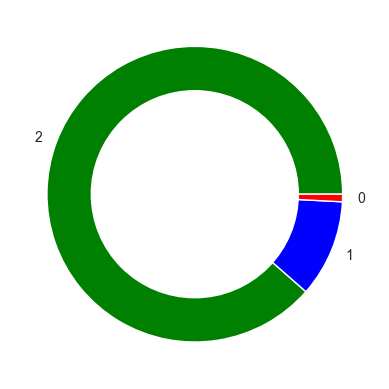

In [103]:
# create data for Pie Chart
pichart = count_values_in_column(data,"label")
# names= pc.index
# size=pc["Percentage"]

names= pichart.index
size=pichart["Percentage"]

# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['green','blue','red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()